In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_logs=pd.read_csv(r"../data/logs.csv",sep=";")

In [4]:
df_logs

,ID,Date,Source,Event group,Event type,Event
0,1,2025-09-12 16:30:39,Startup,system,notice,Device startup completed
1,2,2025-09-12 16:30:41,Switch Events,network,notice,Port link state of port CPU/WiFi (1000 baseT) ...
2,3,2025-09-12 16:30:41,Switch Events,network,notice,Port link state of port WAN (1000 baseT) chang...
3,4,2025-09-12 16:37:33,DHCP,network,info,Leased 192.168.1.232 IP address for client b0:...
4,5,2025-09-12 16:37:33,WiFi,connections,notice,RUT_E127_5G: WiFi client connected: B0:DC:EF:B...
...,...,...,...,...,...,...
182,183,2025-09-25 17:28:19,WiFi,connections,notice,RUT_D8B8_2G: WiFi client connected: D8:13:2A:3...
183,184,2025-09-25 17:28:29,WiFi,connections,notice,RUT_D8B8_2G: WiFi client disconnected: EC:64:C...
184,185,2025-09-25 17:28:30,WiFi,connections,notice,RUT_D8B8_2G: WiFi client connected: EC:64:C9:9...
185,186,2025-09-25 17:28:32,WiFi,connections,notice,RUT_D8B8_2G: WiFi client connected: 30:C9:22:E...


In [5]:
df_logs.head()

,ID,Date,Source,Event group,Event type,Event
0,1,2025-09-12 16:30:39,Startup,system,notice,Device startup completed
1,2,2025-09-12 16:30:41,Switch Events,network,notice,Port link state of port CPU/WiFi (1000 baseT) ...
2,3,2025-09-12 16:30:41,Switch Events,network,notice,Port link state of port WAN (1000 baseT) chang...
3,4,2025-09-12 16:37:33,DHCP,network,info,Leased 192.168.1.232 IP address for client b0:...
4,5,2025-09-12 16:37:33,WiFi,connections,notice,RUT_E127_5G: WiFi client connected: B0:DC:EF:B...


In [6]:
df_logs.tail()

,ID,Date,Source,Event group,Event type,Event
182,183,2025-09-25 17:28:19,WiFi,connections,notice,RUT_D8B8_2G: WiFi client connected: D8:13:2A:3...
183,184,2025-09-25 17:28:29,WiFi,connections,notice,RUT_D8B8_2G: WiFi client disconnected: EC:64:C...
184,185,2025-09-25 17:28:30,WiFi,connections,notice,RUT_D8B8_2G: WiFi client connected: EC:64:C9:9...
185,186,2025-09-25 17:28:32,WiFi,connections,notice,RUT_D8B8_2G: WiFi client connected: 30:C9:22:E...
186,187,2025-09-25 17:28:41,WiFi,connections,notice,RUT_D8B8_2G: WiFi client connected: EC:64:C9:9...


In [7]:
df_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           187 non-null    int64 
 1   Date         187 non-null    object
 2   Source       187 non-null    object
 3   Event group  187 non-null    object
 4   Event type   187 non-null    object
 5   Event        187 non-null    object
dtypes: int64(1), object(5)
memory usage: 8.9+ KB


In [8]:
df_logs.describe()

,ID
count,187.000000
mean,94.000000
std,54.126395
min,1.000000
25%,47.500000
50%,94.000000
75%,140.500000
max,187.000000


In [9]:
df_logs.value_counts("Source")

Source
WiFi                94
CONFIG              28
Switch Events       28
DHCP                 8
Health checker       8
SIM status           6
Web UI               6
Mobile Data          3
Startup              3
IP Block             1
Network Type         1
Network Operator     1
Name: count, dtype: int64

In [10]:
df_logs.value_counts("Event group")

Event group
connections    101
network         49
events          34
system           3
Name: count, dtype: int64

In [11]:
df_logs.value_counts("Event")

Event
RUT_D8B8_2G: WiFi client connected: EC:64:C9:91:04:5C                                                11
RUT_D8B8_2G: WiFi client connected: 30:C9:22:EF:95:88                                                10
RUT_D8B8_2G: WiFi client disconnected: EC:64:C9:91:04:5C                                             10
RUT_D8B8_2G: WiFi client connected: D8:13:2A:30:5F:88                                                 9
Port link state of port LAN1 changed to DOWN                                                          9
RUT_D8B8_2G: WiFi client disconnected: 30:C9:22:EF:95:88                                              9
Port link state of port LAN1 (100 baseT) changed to UP                                                9
RUT_E127_5G: WiFi client connected: B0:DC:EF:B1:CB:23                                                 8
RUT_D8B8_2G: WiFi client connected: EC:64:C9:91:08:70                                                 8
RUT_D8B8_2G: WiFi client disconnected: D8:13:2A:30:5F:88  

In [12]:
df_logs["Date"]=pd.to_datetime(df_logs["Date"])

#split time and date
def split_date_time(df):
    df["Time"]=df["Date"].dt.time
    df["Date"]=df["Date"].dt.date
    return df

df_logs=split_date_time(df_logs)

# rearrange columns
df_logs=df_logs[["ID","Date","Time","Source","Event group","Event type","Event"]]

In [13]:
df_logs

,ID,Date,Time,Source,Event group,Event type,Event
0,1,2025-09-12,16:30:39,Startup,system,notice,Device startup completed
1,2,2025-09-12,16:30:41,Switch Events,network,notice,Port link state of port CPU/WiFi (1000 baseT) ...
2,3,2025-09-12,16:30:41,Switch Events,network,notice,Port link state of port WAN (1000 baseT) chang...
3,4,2025-09-12,16:37:33,DHCP,network,info,Leased 192.168.1.232 IP address for client b0:...
4,5,2025-09-12,16:37:33,WiFi,connections,notice,RUT_E127_5G: WiFi client connected: B0:DC:EF:B...
...,...,...,...,...,...,...,...
182,183,2025-09-25,17:28:19,WiFi,connections,notice,RUT_D8B8_2G: WiFi client connected: D8:13:2A:3...
183,184,2025-09-25,17:28:29,WiFi,connections,notice,RUT_D8B8_2G: WiFi client disconnected: EC:64:C...
184,185,2025-09-25,17:28:30,WiFi,connections,notice,RUT_D8B8_2G: WiFi client connected: EC:64:C9:9...
185,186,2025-09-25,17:28:32,WiFi,connections,notice,RUT_D8B8_2G: WiFi client connected: 30:C9:22:E...


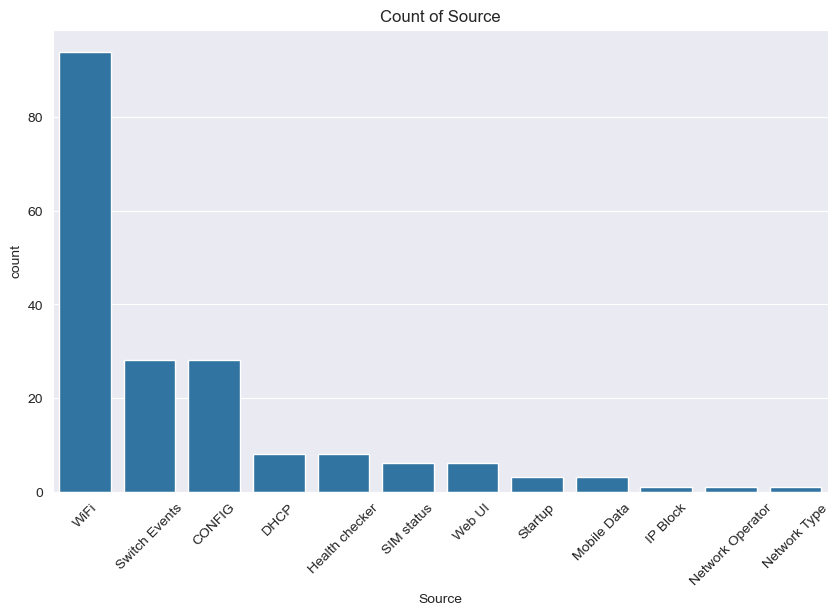

In [44]:
# Count plot of Source
plt.figure(figsize=(10,6))
sns.countplot(data=df_logs, x="Source", order=df_logs["Source"].
value_counts().index)
plt.title("Count of Source")
plt.xticks(rotation=45)
plt.show()


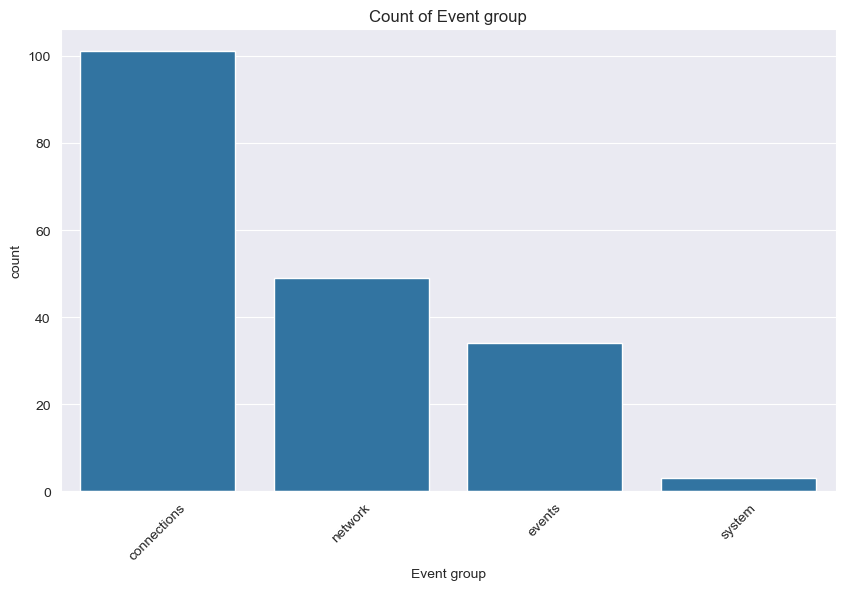

In [46]:
# Count plot of Event group
plt.figure(figsize=(10,6))
sns.countplot(data=df_logs, x="Event group", order=df_logs["Event group"].
value_counts().index)
plt.title("Count of Event group")
plt.xticks(rotation=45)
plt.show()


# Device 1
## for MAC EC:64:C9:91:04:5C

In [16]:
# for MAC EC:64:C9:91:04:5C
# plot time vs specific event
specific_event="RUT_D8B8_2G: WiFi client connected: EC:64:C9:91:04:5C"
specific_event_2="RUT_D8B8_2G: WiFi client disconnected: EC:64:C9:91:04:5C"

# Filter for both connected and disconnected events for the MAC address
df_event = df_logs[(df_logs["Event"] == specific_event) | (df_logs["Event"] == specific_event_2)]

# Keep only relevant columns and reset index
df_event = df_event[["ID", "Time", "Event"]].reset_index(drop=True)

df_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      21 non-null     int64 
 1   Time    21 non-null     object
 2   Event   21 non-null     object
dtypes: int64(1), object(2)
memory usage: 636.0+ bytes


In [17]:
df_event

,ID,Time,Event
0,106,17:14:47,RUT_D8B8_2G: WiFi client connected: EC:64:C9:9...
1,117,17:15:19,RUT_D8B8_2G: WiFi client disconnected: EC:64:C...
2,128,17:15:38,RUT_D8B8_2G: WiFi client connected: EC:64:C9:9...
3,129,17:15:44,RUT_D8B8_2G: WiFi client disconnected: EC:64:C...
4,133,17:16:00,RUT_D8B8_2G: WiFi client connected: EC:64:C9:9...
5,134,17:16:00,RUT_D8B8_2G: WiFi client disconnected: EC:64:C...
6,138,17:16:08,RUT_D8B8_2G: WiFi client connected: EC:64:C9:9...
7,142,17:17:51,RUT_D8B8_2G: WiFi client disconnected: EC:64:C...
8,143,17:17:52,RUT_D8B8_2G: WiFi client connected: EC:64:C9:9...
9,161,17:22:56,RUT_D8B8_2G: WiFi client disconnected: EC:64:C...


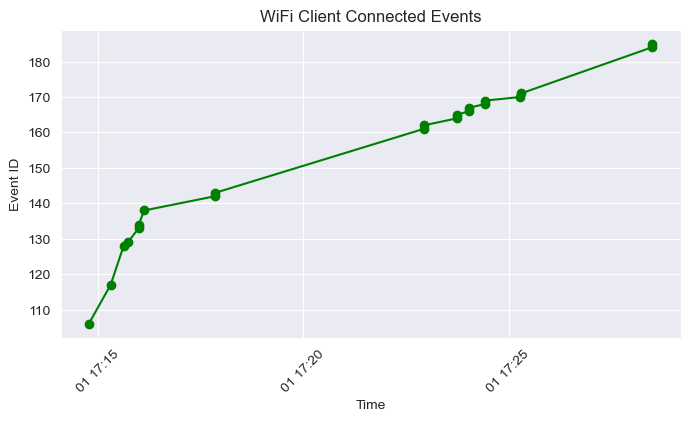

In [18]:
# Ensure 'Time_dt' exists before filtering
if 'Time_dt' not in df_event.columns:
    df_event['Time_dt'] = pd.to_datetime(df_event['Time'].astype(str), format='%H:%M:%S')

df_connected = df_event[df_event["Event"].str.contains("connected")]
plt.figure(figsize=(8, 4))
plt.plot(df_connected["Time_dt"], df_connected["ID"], marker='o', color='green')
plt.title("WiFi Client Connected Events")
plt.xlabel("Time")
plt.ylabel("Event ID")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

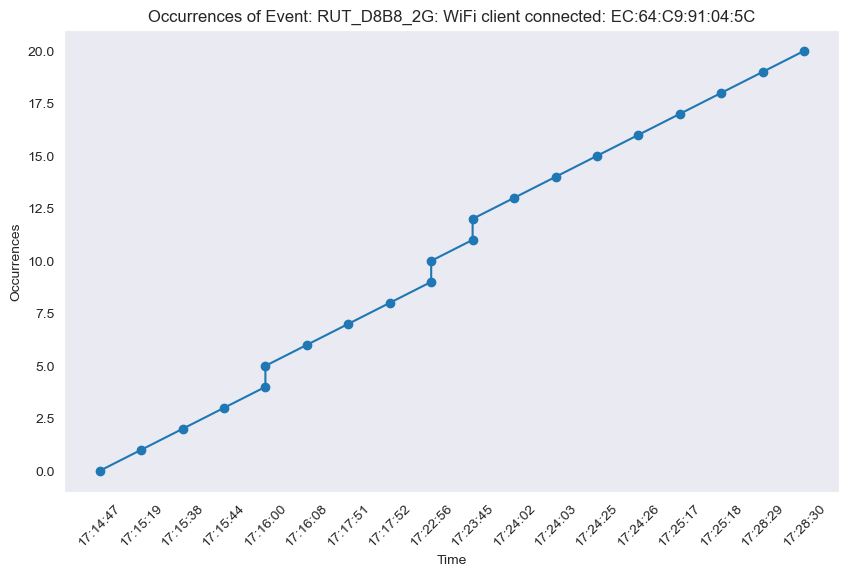

In [19]:
# Convert Time to string for plotting
df_event["Time_str"] = df_event["Time"].astype(str)

plt.figure(figsize=(10,6))
plt.plot(df_event["Time_str"], df_event.index, marker='o')
plt.title(f"Occurrences of Event: {specific_event}")
plt.xlabel("Time")
plt.ylabel("Occurrences")
plt.xticks(rotation=45)
plt.grid()
plt.show()


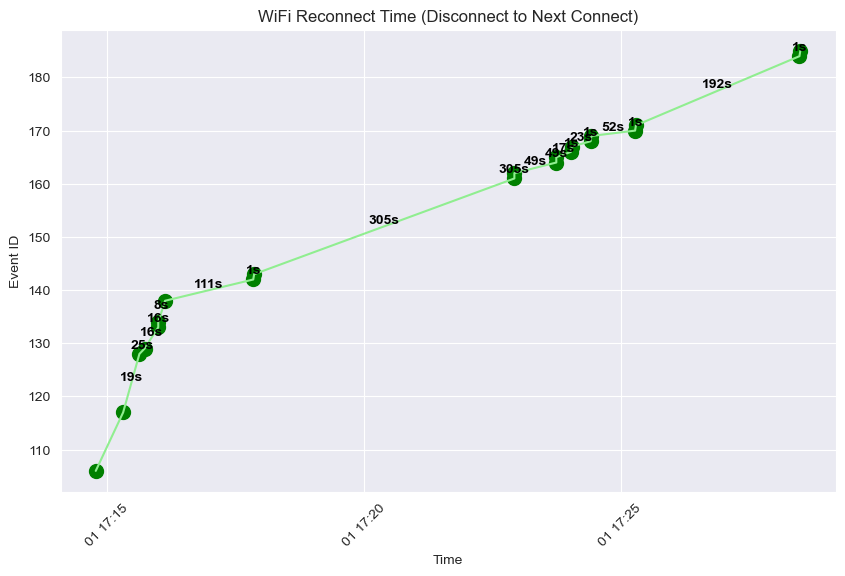

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure Time is in datetime format
df_event['Time_dt'] = pd.to_datetime(df_event['Time'], format='%H:%M:%S')

# Filter events
df_connect = df_event[df_event['Event'].str.contains('connected')].reset_index(drop=True)
df_disconnect = df_event[df_event['Event'].str.contains('disconnected')].reset_index(drop=True)

# Calculate time difference between previous disconnect and current connect
reconnect_diffs = [None]
for i in range(1, len(df_connect)):
    curr_connect_time = df_connect.loc[i, 'Time_dt']
    prev_disconnect = df_disconnect[df_disconnect['Time_dt'] < curr_connect_time]
    if not prev_disconnect.empty:
        disconnect_time = prev_disconnect.iloc[-1]['Time_dt']
        diff = (curr_connect_time - disconnect_time).total_seconds()
    else:
        diff = np.nan
    reconnect_diffs.append(diff)
df_connect['reconnect_diff'] = reconnect_diffs

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_connect['Time_dt'], df_connect['ID'], color='green', s=100)
plt.plot(df_connect['Time_dt'], df_connect['ID'], color='lightgreen')

# Annotate lines between connect events with time difference
for i in range(1, len(df_connect)):
    x1, y1 = df_connect.loc[i-1, 'Time_dt'], df_connect.loc[i-1, 'ID']
    x2, y2 = df_connect.loc[i, 'Time_dt'], df_connect.loc[i, 'ID']
    diff = df_connect.loc[i, 'reconnect_diff']
    if diff is not None and not np.isnan(diff):
        mid_x = x1 + (x2 - x1) / 2
        mid_y = y1 + (y2 - y1) / 2
        plt.text(mid_x, mid_y, f"{int(diff)}s", color="black", ha="center", va="bottom", fontweight="bold")

plt.title("WiFi Reconnect Time (Disconnect to Next Connect)")
plt.xlabel("Time")
plt.ylabel("Event ID")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

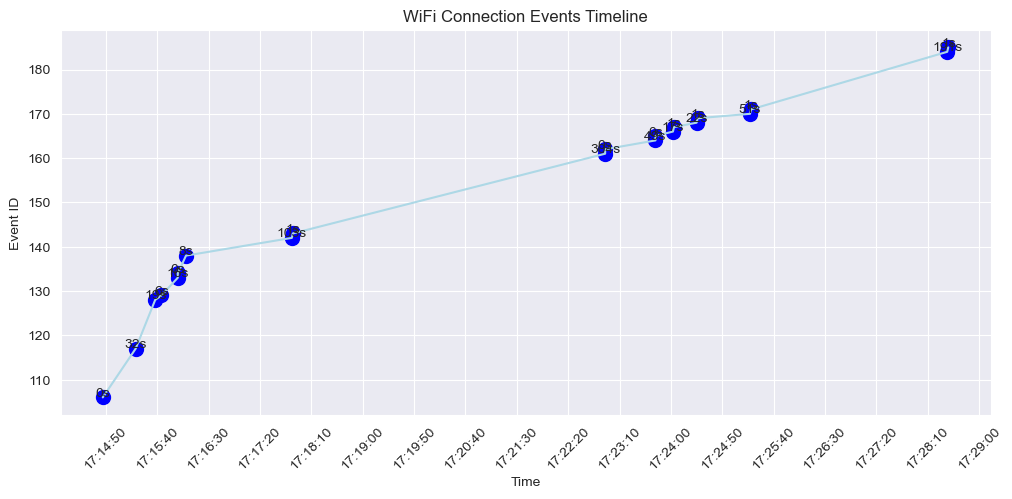

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure 'Time_dt' exists
if 'Time_dt' not in df_event.columns:
    df_event['Time_dt'] = pd.to_datetime(df_event['Time'].astype(str), format='%H:%M:%S')

# Create 'diff_seconds' if missing
if 'diff_seconds' not in df_event.columns:
    df_event['diff_seconds'] = df_event['Time_dt'].diff().dt.total_seconds()
    df_event['diff_seconds'] = df_event['diff_seconds'].fillna(0)

plt.figure(figsize=(12, 5))
ax = plt.gca()

plt.scatter(df_event['Time_dt'], df_event['ID'], s=100, color='blue')
plt.plot(df_event['Time_dt'], df_event['ID'], linestyle='-', color='lightblue')

# Annotate each event with time difference in seconds
for i, row in df_event.iterrows():
    plt.text(row['Time_dt'], row['ID']+0.2, f"{int(row['diff_seconds'])}s", ha='center')

ax.xaxis.set_major_locator(mdates.SecondLocator(interval=50))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

plt.title("WiFi Connection Events Timeline")
plt.xlabel("Time")
plt.ylabel("Event ID")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

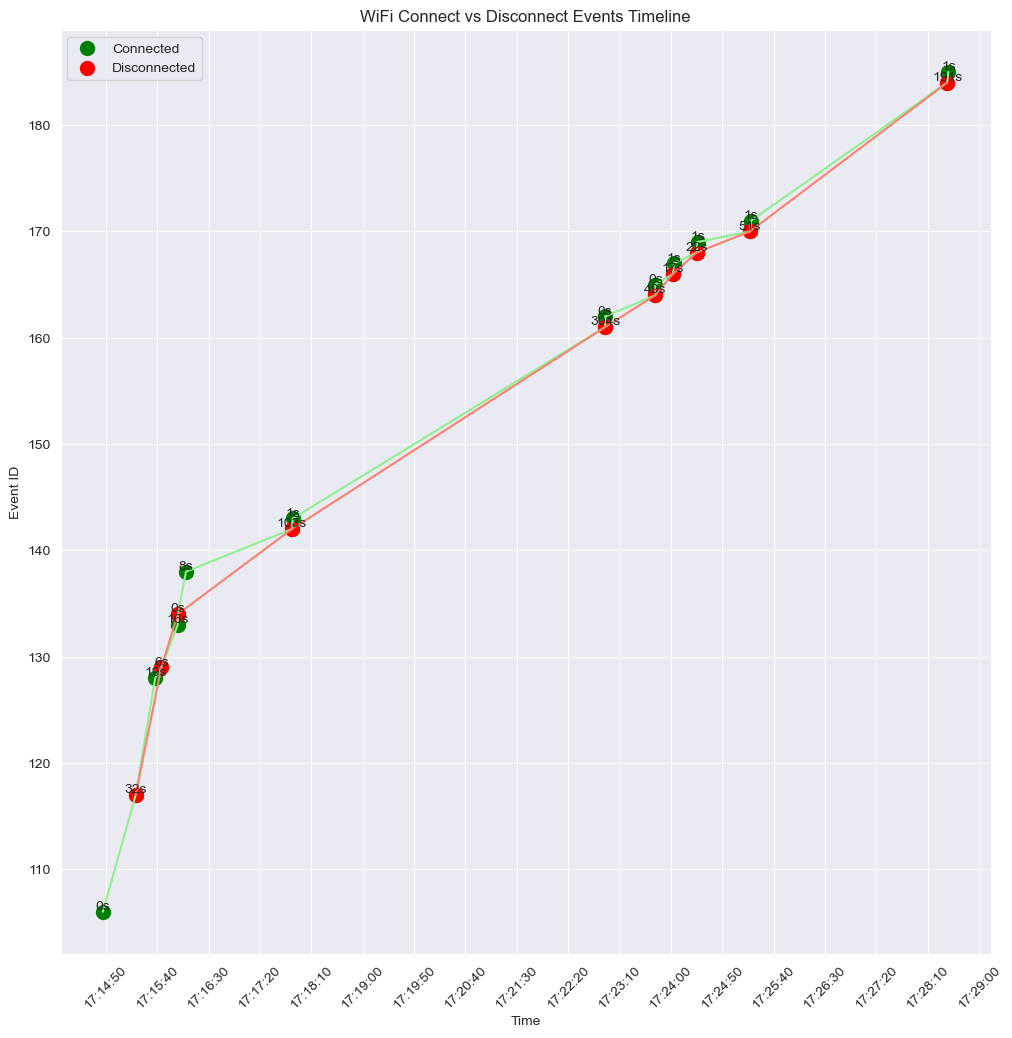

In [22]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Filter connect and disconnect events
df_connect = df_event[df_event["Event"].str.contains("connected")]
df_disconnect = df_event[df_event["Event"].str.contains("disconnected")]

plt.figure(figsize=(12, 12))
ax = plt.gca()

# Plot connect events
plt.scatter(df_connect['Time_dt'], df_connect['ID'], s=100, color='green', label='Connected')
plt.plot(df_connect['Time_dt'], df_connect['ID'], linestyle='-', color='lightgreen')

# Plot disconnect events
plt.scatter(df_disconnect['Time_dt'], df_disconnect['ID'], s=100, color='red', label='Disconnected')
plt.plot(df_disconnect['Time_dt'], df_disconnect['ID'], linestyle='-', color='salmon')

# Annotate each event with time difference in seconds
for i, row in df_event.iterrows():
    plt.text(row['Time_dt'], row['ID']+0.2, f"{int(row['diff_seconds'])}s", ha='center')

# Format x-axis for time
ax.xaxis.set_major_locator(mdates.SecondLocator(interval=50))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

plt.title("WiFi Connect vs Disconnect Events Timeline")
plt.xlabel("Time")
plt.ylabel("Event ID")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

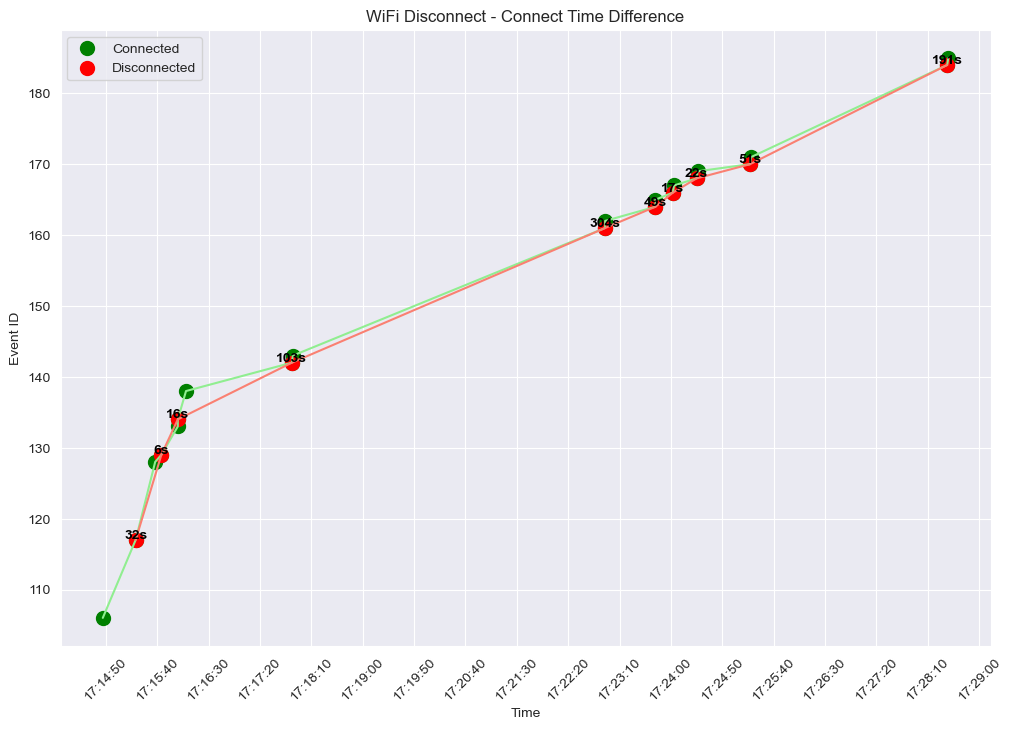

In [23]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Ensure Time_dt is datetime
if 'Time_dt' not in df_event.columns:
    df_event['Time_dt'] = pd.to_datetime(df_event['Time_str'], format='%H:%M:%S')

# Calculate disconnect - previous connect time
disconnect_deltas = []
for idx, row in df_disconnect.iterrows():
    # Find previous connect event
    prev_connect = df_connect[df_connect['Time_dt'] < row['Time_dt']]
    if not prev_connect.empty:
        last_connect_time = prev_connect.iloc[-1]['Time_dt']
        delta = (row['Time_dt'] - last_connect_time).total_seconds()
    else:
        delta = None
    disconnect_deltas.append(delta)

df_disconnect = df_disconnect.copy()
df_disconnect['connect_diff_seconds'] = disconnect_deltas

plt.figure(figsize=(12, 8))
ax = plt.gca()

plt.scatter(df_connect['Time_dt'], df_connect['ID'], s=100, color='green', label='Connected')
plt.plot(df_connect['Time_dt'], df_connect['ID'], linestyle='-', color='lightgreen')

plt.scatter(df_disconnect['Time_dt'], df_disconnect['ID'], s=100, color='red', label='Disconnected')
plt.plot(df_disconnect['Time_dt'], df_disconnect['ID'], linestyle='-', color='salmon')

# Annotate disconnect events with time since previous connect
for i, row in df_disconnect.iterrows():
    if row['connect_diff_seconds'] is not None:
        plt.text(row['Time_dt'], row['ID']+0.2, f"{int(row['connect_diff_seconds'])}s", ha='center', color='black', fontweight='bold')

ax.xaxis.set_major_locator(mdates.SecondLocator(interval=50))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

plt.title("WiFi Disconnect - Connect Time Difference")
plt.xlabel("Time")
plt.ylabel("Event ID")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

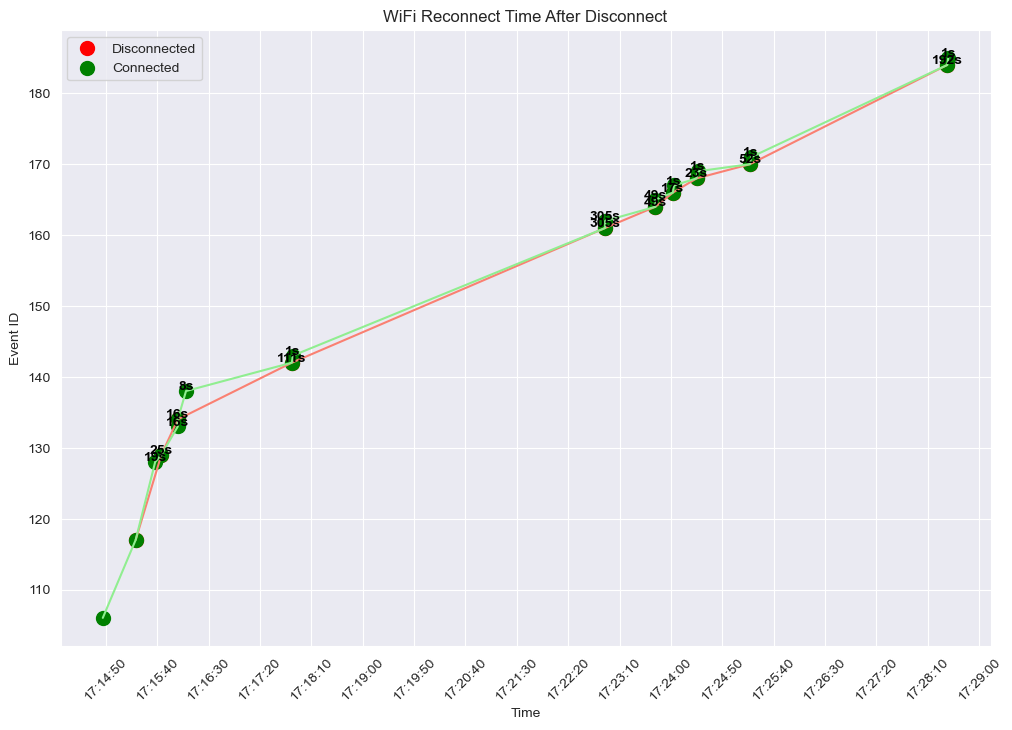

In [24]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Ensure Time_str and Time_dt columns exist
if 'Time_str' not in df_event.columns:
    df_event['Time_str'] = df_event['Time'].astype(str)
if 'Time_dt' not in df_event.columns:
    df_event['Time_dt'] = pd.to_datetime(df_event['Time_str'], format='%H:%M:%S')

# Filter connect and disconnect events
df_connect = df_event[df_event["Event"].str.contains("connected")].copy()
df_disconnect = df_event[df_event["Event"].str.contains("disconnected")].copy()

# Calculate connect - previous disconnect time
connect_deltas = []
for idx, row in df_connect.iterrows():
    prev_disconnect = df_disconnect[df_disconnect['Time_dt'] < row['Time_dt']]
    if not prev_disconnect.empty:
        last_disconnect_time = prev_disconnect.iloc[-1]['Time_dt']
        delta = (row['Time_dt'] - last_disconnect_time).total_seconds()
    else:
        delta = None
    connect_deltas.append(delta)

df_connect['reconnect_seconds'] = connect_deltas

plt.figure(figsize=(12, 8))
ax = plt.gca()

plt.scatter(df_disconnect['Time_dt'], df_disconnect['ID'], s=100, color='red', label='Disconnected')
plt.plot(df_disconnect['Time_dt'], df_disconnect['ID'], linestyle='-', color='salmon')

plt.scatter(df_connect['Time_dt'], df_connect['ID'], s=100, color='green', label='Connected')
plt.plot(df_connect['Time_dt'], df_connect['ID'], linestyle='-', color='lightgreen')

# Annotate connect events with time since previous disconnect
for i, row in df_connect.iterrows():
    val = row['reconnect_seconds']
    if not pd.isna(val):
        plt.text(row['Time_dt'], row['ID']+0.2, f"{int(val)}s", ha='center', color='black', fontweight='bold')

ax.xaxis.set_major_locator(mdates.SecondLocator(interval=50))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

plt.title("WiFi Reconnect Time After Disconnect")
plt.xlabel("Time")
plt.ylabel("Event ID")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

C:\Users\ROG\AppData\Local\Temp\ipykernel_5668\2438666924.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_event['diff_seconds'].fillna(0, inplace=True)  # first event has no previous


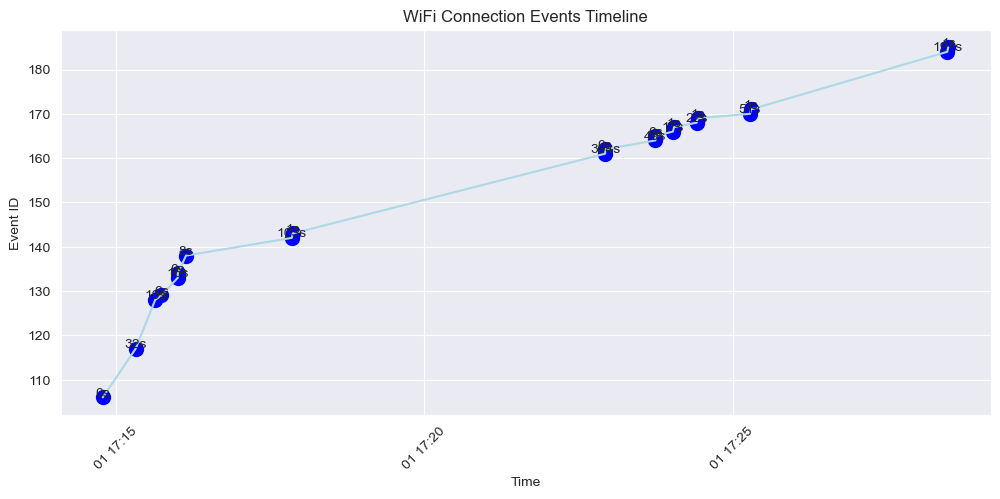

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_event already exists
# Step 1: Convert Time_str to datetime
df_event['Time_dt'] = pd.to_datetime(df_event['Time_str'], format='%H:%M:%S')

# Step 2: Calculate difference in seconds between consecutive events
df_event['diff_seconds'] = df_event['Time_dt'].diff().dt.total_seconds()
df_event['diff_seconds'].fillna(0, inplace=True)  # first event has no previous

# Step 3: Plot timeline
plt.figure(figsize=(12, 5))

# Plot each event as a marker
plt.scatter(df_event['Time_dt'], df_event['ID'], s=100, color='blue')

# Connect events with lines
plt.plot(df_event['Time_dt'], df_event['ID'], linestyle='-', color='lightblue')

# Optional: annotate with seconds difference
for i, row in df_event.iterrows():
    plt.text(row['Time_dt'], row['ID']+0.2, f"{int(row['diff_seconds'])}s", ha='center')

# Beautify plot
plt.title("WiFi Connection Events Timeline")
plt.xlabel("Time")
plt.ylabel("Event ID")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


# Device 2
## for MAC

In [26]:
# for MAC 30:C9:22:EF:95:88
# plot time vs specific event
specific_event="RUT_D8B8_2G: WiFi client connected: 30:C9:22:EF:95:88"
df_event=df_logs[df_logs["Event"]==specific_event]

# df remove unused columns
df_event=df_event[["ID","Time","Event"]].reset_index()
df_event = df_event.drop("index", axis=1)
df_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      10 non-null     int64 
 1   Time    10 non-null     object
 2   Event   10 non-null     object
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes


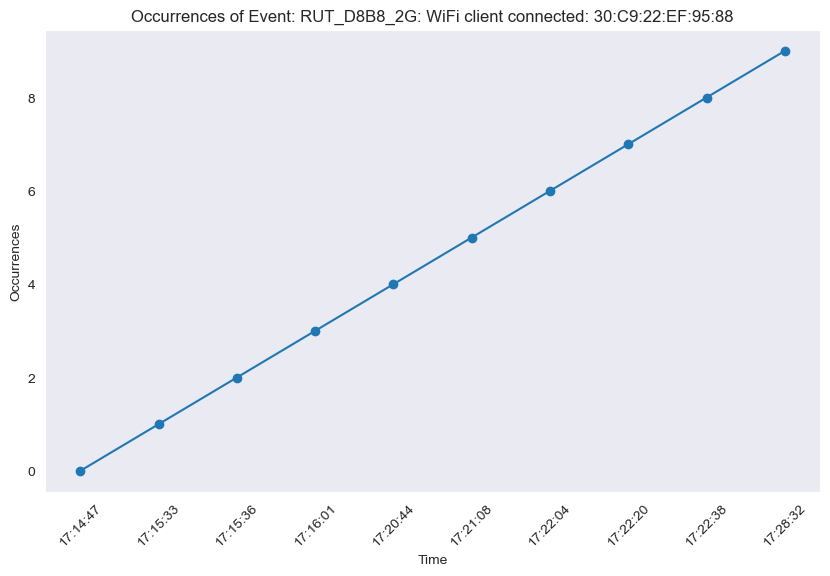

In [27]:
# Convert Time to string for plotting
df_event["Time_str"] = df_event["Time"].astype(str)

plt.figure(figsize=(10,6))
plt.plot(df_event["Time_str"], df_event.index, marker='o')
plt.title(f"Occurrences of Event: {specific_event}")
plt.xlabel("Time")
plt.ylabel("Occurrences")
plt.xticks(rotation=45)
plt.grid()
plt.show()


C:\Users\ROG\AppData\Local\Temp\ipykernel_5668\2438666924.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_event['diff_seconds'].fillna(0, inplace=True)  # first event has no previous


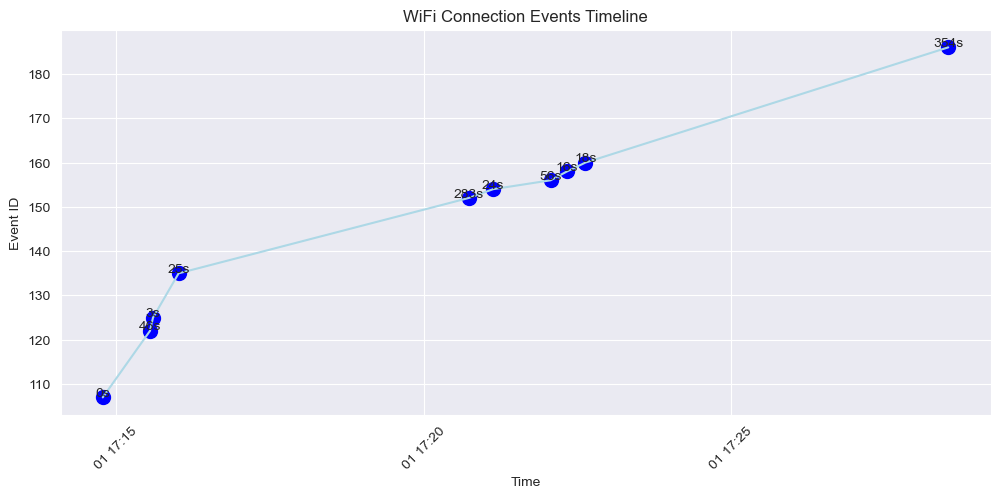

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_event already exists
# Step 1: Convert Time_str to datetime
df_event['Time_dt'] = pd.to_datetime(df_event['Time_str'], format='%H:%M:%S')

# Step 2: Calculate difference in seconds between consecutive events
df_event['diff_seconds'] = df_event['Time_dt'].diff().dt.total_seconds()
df_event['diff_seconds'].fillna(0, inplace=True)  # first event has no previous

# Step 3: Plot timeline
plt.figure(figsize=(12, 5))

# Plot each event as a marker
plt.scatter(df_event['Time_dt'], df_event['ID'], s=100, color='blue')

# Connect events with lines
plt.plot(df_event['Time_dt'], df_event['ID'], linestyle='-', color='lightblue')

# Optional: annotate with seconds difference
for i, row in df_event.iterrows():
    plt.text(row['Time_dt'], row['ID']+0.2, f"{int(row['diff_seconds'])}s", ha='center')

# Beautify plot
plt.title("WiFi Connection Events Timeline")
plt.xlabel("Time")
plt.ylabel("Event ID")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


# Device 3
## for MAC

In [29]:
# for MAC D8:13:2A:30:5F:88
# plot time vs specific event
specific_event="RUT_D8B8_2G: WiFi client connected: D8:13:2A:30:5F:88"
df_event=df_logs[df_logs["Event"]==specific_event]

# df remove unused columns
df_event=df_event[["ID","Time","Event"]].reset_index()
df_event = df_event.drop("index", axis=1)
df_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      9 non-null      int64 
 1   Time    9 non-null      object
 2   Event   9 non-null      object
dtypes: int64(1), object(2)
memory usage: 348.0+ bytes


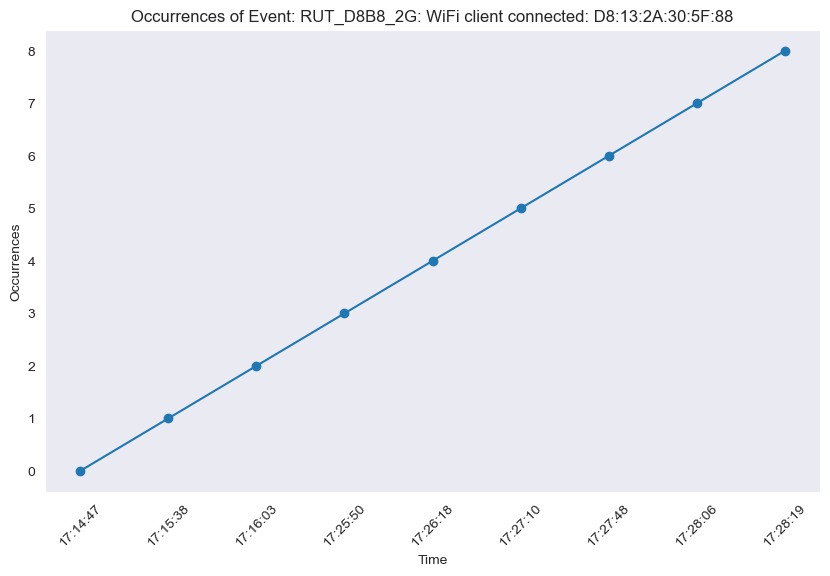

In [30]:
# Convert Time to string for plotting
df_event["Time_str"] = df_event["Time"].astype(str)

plt.figure(figsize=(10,6))
plt.plot(df_event["Time_str"], df_event.index, marker='o')
plt.title(f"Occurrences of Event: {specific_event}")
plt.xlabel("Time")
plt.ylabel("Occurrences")
plt.xticks(rotation=45)
plt.grid()
plt.show()


C:\Users\ROG\AppData\Local\Temp\ipykernel_5668\2438666924.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_event['diff_seconds'].fillna(0, inplace=True)  # first event has no previous


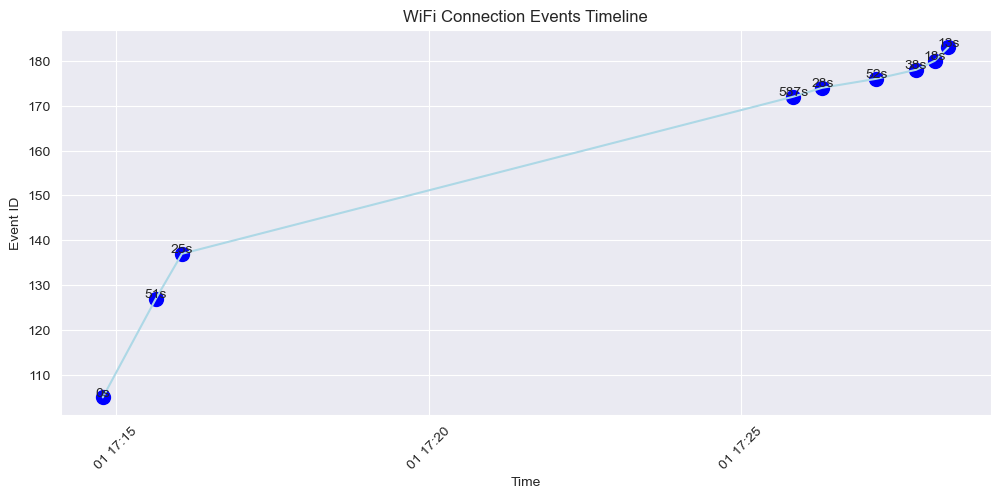

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_event already exists
# Step 1: Convert Time_str to datetime
df_event['Time_dt'] = pd.to_datetime(df_event['Time_str'], format='%H:%M:%S')

# Step 2: Calculate difference in seconds between consecutive events
df_event['diff_seconds'] = df_event['Time_dt'].diff().dt.total_seconds()
df_event['diff_seconds'].fillna(0, inplace=True)  # first event has no previous

# Step 3: Plot timeline
plt.figure(figsize=(12, 5))

# Plot each event as a marker
plt.scatter(df_event['Time_dt'], df_event['ID'], s=100, color='blue')

# Connect events with lines
plt.plot(df_event['Time_dt'], df_event['ID'], linestyle='-', color='lightblue')

# Optional: annotate with seconds difference
for i, row in df_event.iterrows():
    plt.text(row['Time_dt'], row['ID']+0.2, f"{int(row['diff_seconds'])}s", ha='center')

# Beautify plot
plt.title("WiFi Connection Events Timeline")
plt.xlabel("Time")
plt.ylabel("Event ID")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


# Device 4
## for MAC

In [32]:
# for MAC EC:64:C9:91:08:70
# plot time vs specific event
specific_event="RUT_D8B8_2G: WiFi client connected: EC:64:C9:91:08:70"
df_event=df_logs[df_logs["Event"]==specific_event]

# df remove unused columns
df_event=df_event[["ID","Time","Event"]].reset_index()
df_event = df_event.drop("index", axis=1)
df_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      8 non-null      int64 
 1   Time    8 non-null      object
 2   Event   8 non-null      object
dtypes: int64(1), object(2)
memory usage: 324.0+ bytes


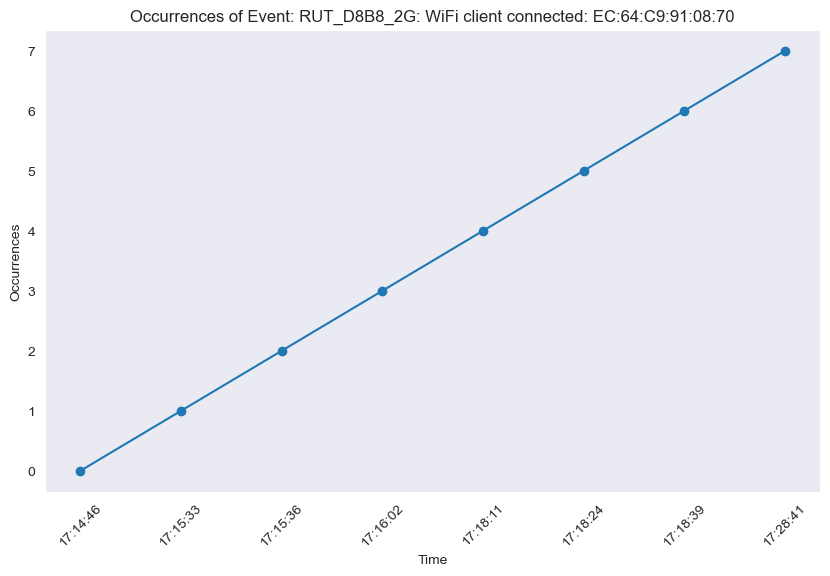

In [33]:
# Convert Time to string for plotting
df_event["Time_str"] = df_event["Time"].astype(str)

plt.figure(figsize=(10,6))
plt.plot(df_event["Time_str"], df_event.index, marker='o')
plt.title(f"Occurrences of Event: {specific_event}")
plt.xlabel("Time")
plt.ylabel("Occurrences")
plt.xticks(rotation=45)
plt.grid()
plt.show()


C:\Users\ROG\AppData\Local\Temp\ipykernel_5668\2438666924.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_event['diff_seconds'].fillna(0, inplace=True)  # first event has no previous


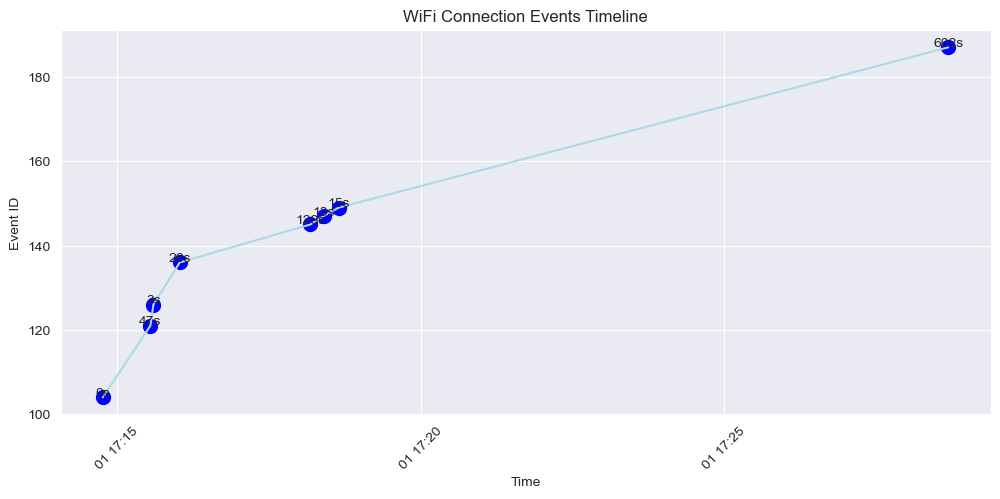

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_event already exists
# Step 1: Convert Time_str to datetime
df_event['Time_dt'] = pd.to_datetime(df_event['Time_str'], format='%H:%M:%S')

# Step 2: Calculate difference in seconds between consecutive events
df_event['diff_seconds'] = df_event['Time_dt'].diff().dt.total_seconds()
df_event['diff_seconds'].fillna(0, inplace=True)  # first event has no previous

# Step 3: Plot timeline
plt.figure(figsize=(12, 5))

# Plot each event as a marker
plt.scatter(df_event['Time_dt'], df_event['ID'], s=100, color='blue')

# Connect events with lines
plt.plot(df_event['Time_dt'], df_event['ID'], linestyle='-', color='lightblue')

# Optional: annotate with seconds difference
for i, row in df_event.iterrows():
    plt.text(row['Time_dt'], row['ID']+0.2, f"{int(row['diff_seconds'])}s", ha='center')

# Beautify plot
plt.title("WiFi Connection Events Timeline")
plt.xlabel("Time")
plt.ylabel("Event ID")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


# All Device Graph

In [35]:
# plot scatter + Line plot of event ID and Time of 4 specific Event
event_1 = "RUT_D8B8_2G: WiFi client connected: EC:64:C9:91:04:5C"
event_2 = "RUT_D8B8_2G: WiFi client connected: 30:C9:22:EF:95:88"
event_3 = "RUT_D8B8_2G: WiFi client connected: D8:13:2A:30:5F:88"
event_4 = "RUT_D8B8_2G: WiFi client connected: EC:64:C9:91:08:70"

df_event_1 = df_logs[df_logs["Event"] == event_1][["ID", "Time"]].reset_index(drop=True)
df_event_2 = df_logs[df_logs["Event"] == event_2][["ID", "Time"]].reset_index(drop=True)
df_event_3 = df_logs[df_logs["Event"] == event_3][["ID", "Time"]].reset_index(drop=True)
df_event_4 = df_logs[df_logs["Event"] == event_4][["ID", "Time"]].reset_index(drop=True)

# Combine all events into a single DataFrame
df_all_events = pd.concat([df_event_1, df_event_2, df_event_3, df_event_4], ignore_index=True)

# Convert Time to string for plotting
df_all_events["Time_str"] = df_all_events["Time"].astype(str)
df_all_events["Time_dt"] = pd.to_datetime(df_all_events["Time_str"], format='%H:%M:%S')
df_all_events = df_all_events.sort_values(by="Time_dt").reset_index(drop=True)
df_all_events['diff_seconds'] = df_all_events['Time_dt'].diff().dt.total_seconds()
df_all_events['diff_seconds'].fillna(0, inplace=True)  # first event
df_all_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            38 non-null     int64         
 1   Time          38 non-null     object        
 2   Time_str      38 non-null     object        
 3   Time_dt       38 non-null     datetime64[ns]
 4   diff_seconds  38 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 1.6+ KB


C:\Users\ROG\AppData\Local\Temp\ipykernel_5668\2578738057.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_all_events['diff_seconds'].fillna(0, inplace=True)  # first event


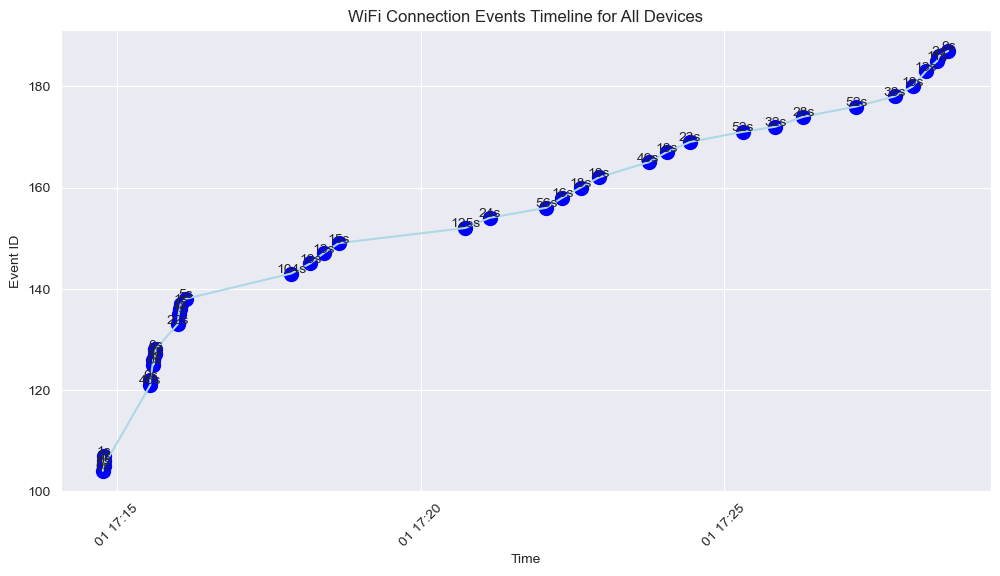

In [36]:
plt.figure(figsize=(12,     6))
plt.scatter(df_all_events["Time_dt"], df_all_events["ID"], s=100, color='blue')
plt.plot(df_all_events["Time_dt"], df_all_events["ID"], linestyle='-', color='lightblue')
for i, row in df_all_events.iterrows():
    plt.text(row['Time_dt'], row['ID']+0.2, f"{int(row['diff_seconds'])}s", ha='center')
plt.title("WiFi Connection Events Timeline for All Devices")
specific_event_1="RUT_D8B8_2G: WiFi client connected: EC:64:C9:91:04:5C"
specific_event_2="RUT_D8B8_2G: WiFi client connected: 30:C9:22:EF:95:88"
specific_event_3="RUT_D8B8_2G: WiFi client connected: D8:13:2A:30:5F:88"
specific_event_4="RUT_D8B8_2G: WiFi client connected: EC:64:C9:91:08:70"
plt.xlabel("Time")
plt.ylabel("Event ID")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [37]:
# Add 'Event' column to each DataFrame
df_event_1 = df_logs[df_logs["Event"] == event_1][["ID", "Time"]].copy()
df_event_1["Event"] = event_1

df_event_2 = df_logs[df_logs["Event"] == event_2][["ID", "Time"]].copy()
df_event_2["Event"] = event_2

df_event_3 = df_logs[df_logs["Event"] == event_3][["ID", "Time"]].copy()
df_event_3["Event"] = event_3

df_event_4 = df_logs[df_logs["Event"] == event_4][["ID", "Time"]].copy()
df_event_4["Event"] = event_4

# Combine all events into a single DataFrame
df_all_events = pd.concat([df_event_1, df_event_2, df_event_3, df_event_4], ignore_index=True)

# Continue with your plotting code
# Convert Time to string and then to datetime for all events
df_all_events["Time_str"] = df_all_events["Time"].astype(str)
df_all_events["Time_dt"] = pd.to_datetime(df_all_events["Time_str"], format='%H:%M:%S')

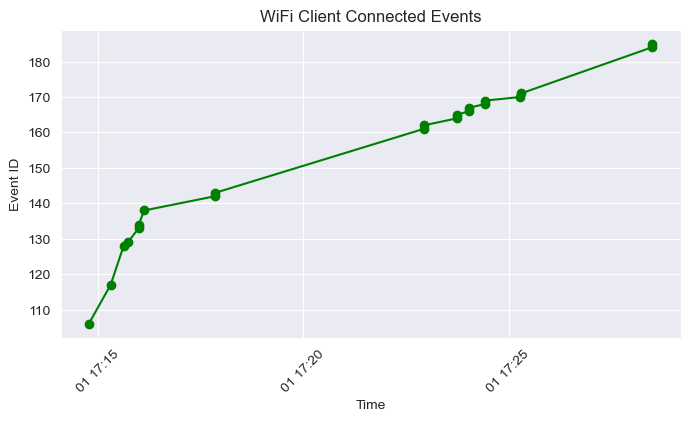

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# If 'Time' is a datetime.time object, convert to string first
df_connected['Time_str'] = df_connected['Time'].astype(str)
# Convert to datetime using a dummy date
df_connected['Time_dt'] = pd.to_datetime(df_connected['Time_str'], format='%H:%M:%S')

plt.figure(figsize=(8, 4))
plt.plot(df_connected['Time_dt'], df_connected['ID'], marker='o', color='green')
plt.title("WiFi Client Connected Events")
plt.xlabel("Time")
plt.ylabel("Event ID")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [39]:
# Export processed logs and event DataFrames
import os
os.makedirs('../src/static',exist_ok=True)
df_logs.to_csv('log_dashboard/data/processed_logs.csv', index=False)
df_event.to_csv('log_dashboard/data/processed_event.csv', index=False)

# Save connect/disconnect timeline plots
# Convert 'Time' to string, then to datetime for plotting

df_connected['Time_str'] = df_connected['Time'].astype(str)
df_connected['Time_dt'] = pd.to_datetime(df_connected['Time_str'], format='%H:%M:%S')
plt.figure(figsize=(8, 4))
plt.plot(df_connected['Time_dt'], df_connected['ID'], marker='o', color='green')
plt.title("WiFi Client Connected Events")
plt.xlabel("Time")
plt.ylabel("Event ID")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('log_dashboard/app/static/connect_timeline.png')
plt.close()

# Make sure df_event or df_logs is defined and contains the relevant data
df_disconnected = df_logs[df_logs['Event'].str.contains('disconnected')].copy()

# Now you can safely process and plot
df_disconnected['Time_str'] = df_disconnected['Time'].astype(str)
df_disconnected['Time_dt'] = pd.to_datetime(df_disconnected['Time_str'], format='%H:%M:%S')
plt.figure(figsize=(8, 4))
plt.plot(df_disconnected['Time_dt'], df_disconnected['ID'], marker='o', color='red')
plt.title("WiFi Client Disconnected Events")
plt.xlabel("Time")
plt.ylabel("Event ID")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('log_dashboard/app/static/disconnect_timeline.png')
plt.close()

df_disconnected['Time_str'] = df_disconnected['Time'].astype(str)
df_disconnected['Time_dt'] = pd.to_datetime(df_disconnected['Time_str'], format='%H:%M:%S')
plt.figure(figsize=(8, 4))
plt.plot(df_disconnected['Time_dt'], df_disconnected['ID'], marker='o', color='red')
plt.title("WiFi Client Disconnected Events")
plt.xlabel("Time")
plt.ylabel("Event ID")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('log_dashboard/app/static/disconnect_timeline.png')
plt.close()

plt.figure(figsize=(10,6))
sns.countplot(data=df_logs, x="Event group", order=df_logs["Event group"].value_counts().index)
plt.title("Count of Event group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('log_dashboard/app/static/event_group_count.png')
plt.close()


In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# List of specific disconnected events
specific_disconnected_events = [
    "RUT_D8B8_2G: WiFi client disconnected: EC:64:C9:91:04:5C",
    "RUT_D8B8_2G: WiFi client disconnected: 30:C9:22:EF:95:88",
    "RUT_D8B8_2G: WiFi client disconnected: D8:13:2A:30:5F:88",
    "RUT_D8B8_2G: WiFi client disconnected: EC:64:C9:91:08:70"
]

# Filter for only those specific disconnected events
df_disconnected = df_logs[df_logs['Event'].isin(specific_disconnected_events)].copy()

if not df_disconnected.empty:
    df_disconnected['Time_str'] = df_disconnected['Time'].astype(str)
    df_disconnected['Time_dt'] = pd.to_datetime(df_disconnected['Time_str'], format='%H:%M:%S')
    plt.figure(figsize=(8, 4))
    plt.plot(df_disconnected['Time_dt'], df_disconnected['ID'], marker='o', color='red')
    plt.title("Specific WiFi Client Disconnected Events")
    plt.xlabel("Time")
    plt.ylabel("Event ID")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('log_dashboard/app/static/disconnect_timeline.png')
    plt.close()
else:
    plt.figure(figsize=(8, 4))
    plt.text(0.5, 0.5, 'No specific disconnect events found', ha='center', va='center', fontsize=16)
    plt.axis('off')
    plt.savefig('log_dashboard/app/static/disconnect_timeline.png')
    plt.close()

In [41]:
df_disconnected

,ID,Date,Time,Source,Event group,Event type,Event,Time_str,Time_dt
115,116,2025-09-25,17:15:19,WiFi,connections,notice,RUT_D8B8_2G: WiFi client disconnected: 30:C9:2...,17:15:19,1900-01-01 17:15:19
116,117,2025-09-25,17:15:19,WiFi,connections,notice,RUT_D8B8_2G: WiFi client disconnected: EC:64:C...,17:15:19,1900-01-01 17:15:19
117,118,2025-09-25,17:15:19,WiFi,connections,notice,RUT_D8B8_2G: WiFi client disconnected: D8:13:2...,17:15:19,1900-01-01 17:15:19
118,119,2025-09-25,17:15:19,WiFi,connections,notice,RUT_D8B8_2G: WiFi client disconnected: EC:64:C...,17:15:19,1900-01-01 17:15:19
122,123,2025-09-25,17:15:35,WiFi,connections,notice,RUT_D8B8_2G: WiFi client disconnected: 30:C9:2...,17:15:35,1900-01-01 17:15:35
123,124,2025-09-25,17:15:35,WiFi,connections,notice,RUT_D8B8_2G: WiFi client disconnected: EC:64:C...,17:15:35,1900-01-01 17:15:35
128,129,2025-09-25,17:15:44,WiFi,connections,notice,RUT_D8B8_2G: WiFi client disconnected: EC:64:C...,17:15:44,1900-01-01 17:15:44
129,130,2025-09-25,17:15:45,WiFi,connections,notice,RUT_D8B8_2G: WiFi client disconnected: D8:13:2...,17:15:45,1900-01-01 17:15:45
130,131,2025-09-25,17:15:45,WiFi,connections,notice,RUT_D8B8_2G: WiFi client disconnected: EC:64:C...,17:15:45,1900-01-01 17:15:45
131,132,2025-09-25,17:15:45,WiFi,connections,notice,RUT_D8B8_2G: WiFi client disconnected: 30:C9:2...,17:15:45,1900-01-01 17:15:45


#  Changes in Garphs

In [48]:
# plot the graph of time vs event ID with line plot and scatter plot
# where in df_logs sort the logs with Source = WiFi and Event group = connections and Event type = notice and Event contains "connected" or "disconnected"
df_wifi = df_logs[(df_logs["Source"] == "WiFi") &
                    (df_logs["Event group"] == "connections") &
                    (df_logs["Event type"] == "notice") &
                    (df_logs["Event"].str.contains("connected|disconnected"))].copy()
df_wifi = df_wifi.sort_values(by="Time").reset_index(drop=True)
df_wifi.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           94 non-null     int64 
 1   Date         94 non-null     object
 2   Time         94 non-null     object
 3   Source       94 non-null     object
 4   Event group  94 non-null     object
 5   Event type   94 non-null     object
 6   Event        94 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.3+ KB


In [49]:
df_wifi

,ID,Date,Time,Source,Event group,Event type,Event
0,61,2025-09-25,16:29:35,WiFi,connections,notice,RUT_E127_5G: WiFi client disconnected: B0:DC:E...
1,62,2025-09-25,16:29:36,WiFi,connections,notice,RUT_E127_5G: WiFi client connected: B0:DC:EF:B...
2,64,2025-09-25,16:29:54,WiFi,connections,notice,RUT_E127_5G: WiFi client disconnected: B0:DC:E...
3,65,2025-09-25,16:29:57,WiFi,connections,notice,RUT_E127_5G: WiFi client connected: B0:DC:EF:B...
4,69,2025-09-25,16:31:01,WiFi,connections,notice,RUT_E127_5G: WiFi client disconnected: B0:DC:E...
...,...,...,...,...,...,...,...
89,184,2025-09-25,17:28:29,WiFi,connections,notice,RUT_D8B8_2G: WiFi client disconnected: EC:64:C...
90,185,2025-09-25,17:28:30,WiFi,connections,notice,RUT_D8B8_2G: WiFi client connected: EC:64:C9:9...
91,186,2025-09-25,17:28:32,WiFi,connections,notice,RUT_D8B8_2G: WiFi client connected: 30:C9:22:E...
92,187,2025-09-25,17:28:41,WiFi,connections,notice,RUT_D8B8_2G: WiFi client connected: EC:64:C9:9...


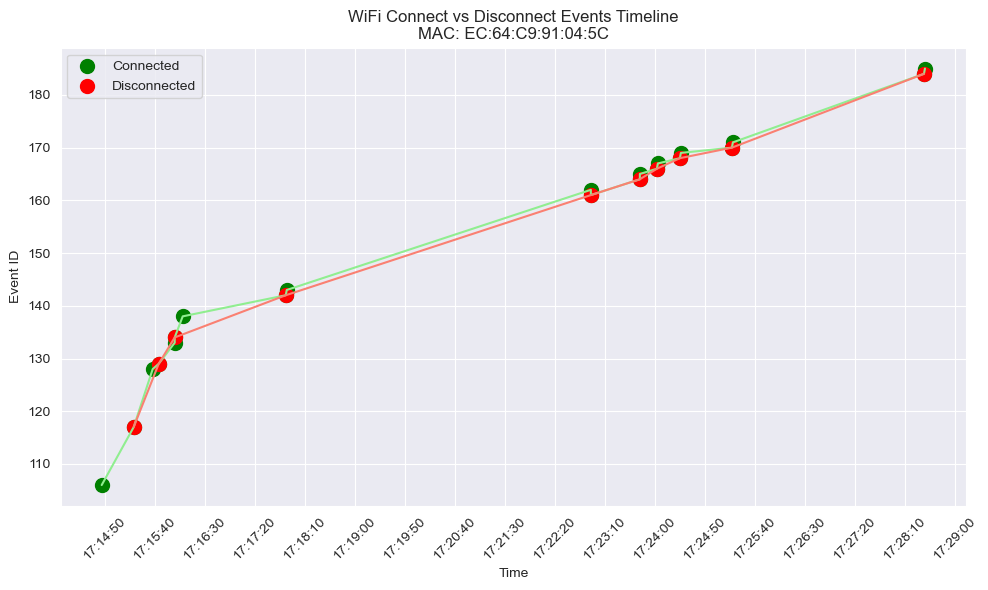

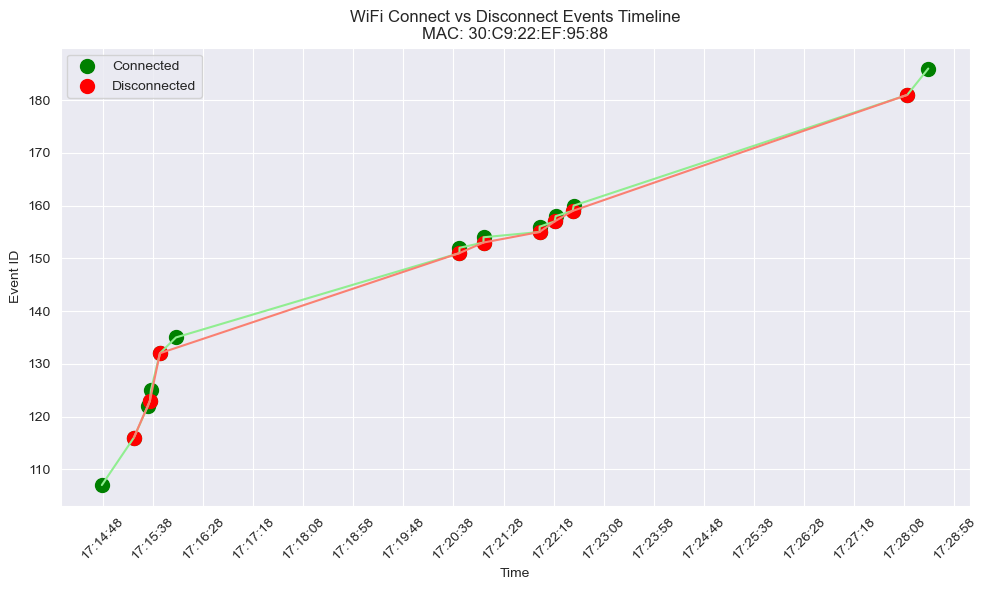

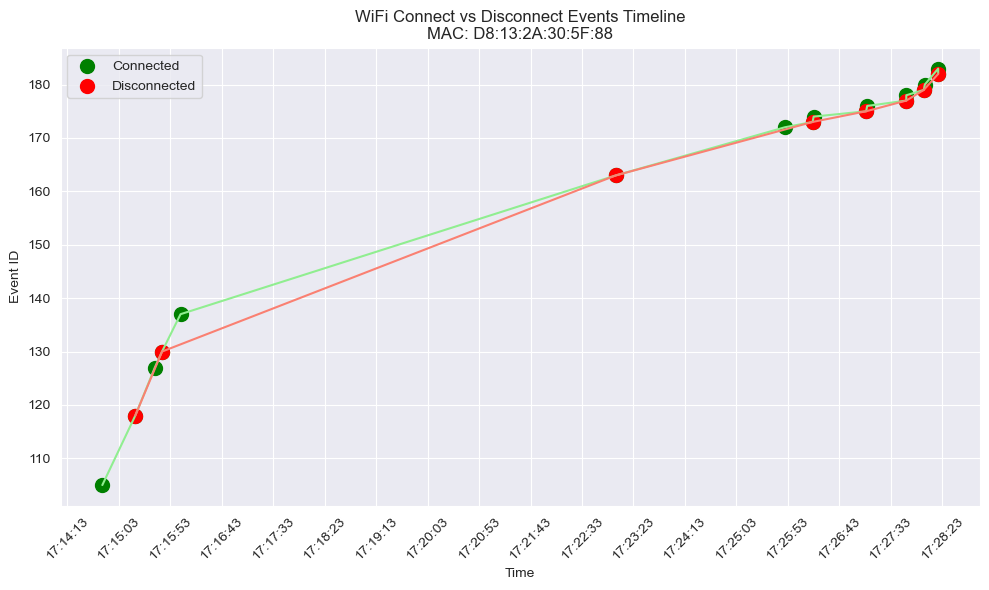

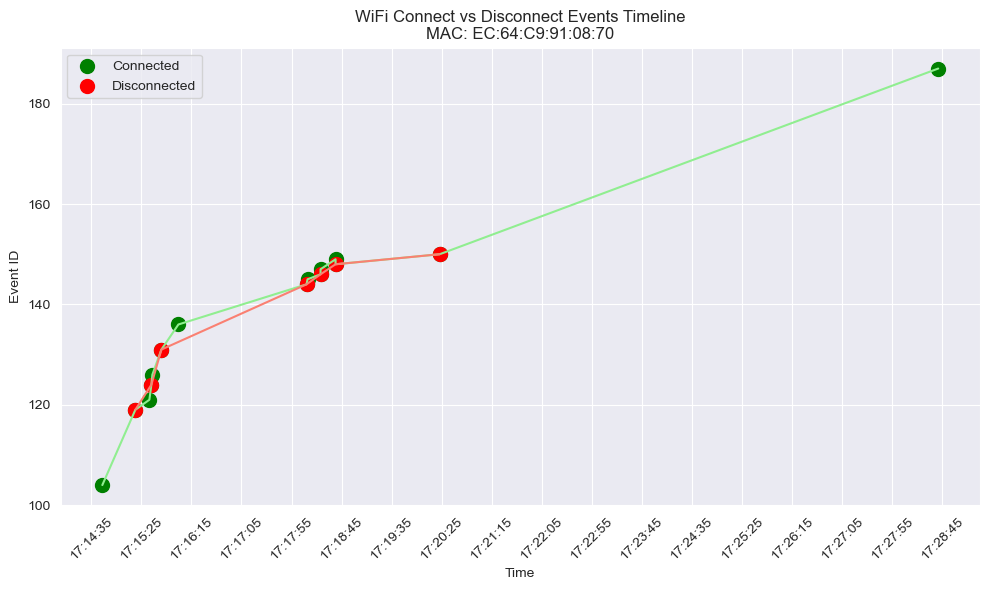

In [63]:
# plot graph of time vs event id now with different color for connected events, different graph for different mac address
# for now i only need plots for these 4 mac addresses
# for MAC EC:64:C9:91:04:5C
# for MAC 30:C9:22:EF:95:88
# for MAC D8:13:2A:30:5F:88
# for MAC EC:64:C9:91:08:70

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# List of target MAC addresses
target_macs = [
    "EC:64:C9:91:04:5C",
    "30:C9:22:EF:95:88",
    "D8:13:2A:30:5F:88",
    "EC:64:C9:91:08:70"
]

# Ensure 'Time_dt' exists
if 'Time_dt' not in df_wifi.columns:
    df_wifi['Time_dt'] = pd.to_datetime(df_wifi['Time'].astype(str), format='%H:%M:%S')

# Create 'diff_seconds' if missing
if 'diff_seconds' not in df_wifi.columns:
    df_wifi['diff_seconds'] = df_wifi['Time_dt'].diff().dt.total_seconds()
    df_wifi['diff_seconds'] = df_wifi['diff_seconds'].fillna(0)

# Extract MAC addresses
df_wifi['MAC'] = df_wifi['Event'].str.extract(r'([0-9A-F]{2}(?::[0-9A-F]{2}){5})', expand=False)

colors = {'connected': 'green', 'disconnected': 'red'}

for mac in target_macs:
    df_mac = df_wifi[df_wifi['MAC'] == mac]
    if df_mac.empty:
        continue
    df_connect = df_mac[df_mac['Event'].str.contains('connected')]
    df_disconnect = df_mac[df_mac['Event'].str.contains('disconnected')]

    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    plt.scatter(df_connect['Time_dt'], df_connect['ID'], s=100, color=colors['connected'], label='Connected')
    plt.plot(df_connect['Time_dt'], df_connect['ID'], linestyle='-', color='lightgreen')
    plt.scatter(df_disconnect['Time_dt'], df_disconnect['ID'], s=100, color=colors['disconnected'], label='Disconnected')
    plt.plot(df_disconnect['Time_dt'], df_disconnect['ID'], linestyle='-', color='salmon')

    for i, row in df_mac.iterrows():
        val = row['diff_seconds']
        if pd.notna(val) and not callable(val):
            plt.text(row['Time_dt'], row['ID']+0.2, f"{int(val)}s", ha='center')

    ax.xaxis.set_major_locator(mdates.SecondLocator(interval=50))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    plt.title(f"WiFi Connect vs Disconnect Events Timeline\nMAC: {mac}")
    plt.xlabel("Time")
    plt.ylabel("Event ID")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'log_dashboard/app/static/wifi_connect_disconnect_timeline_{mac.replace(":", "")}.png')
    plt.show()
    plt.close()

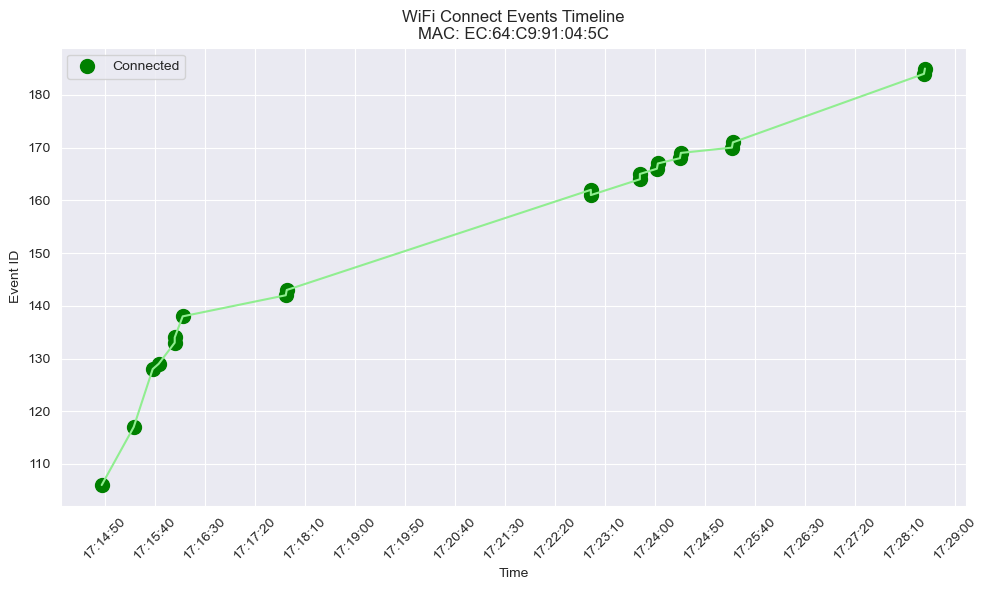

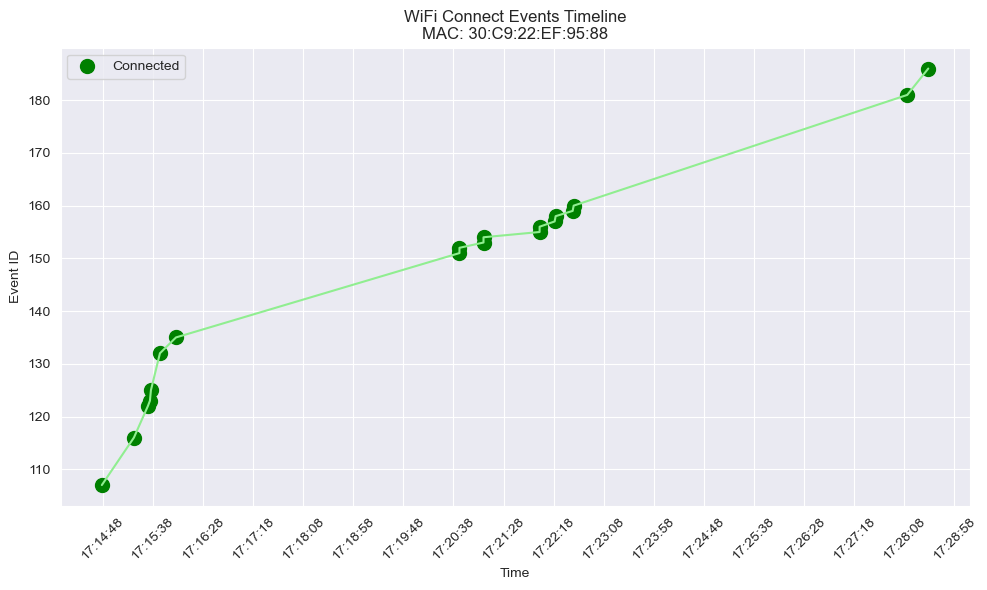

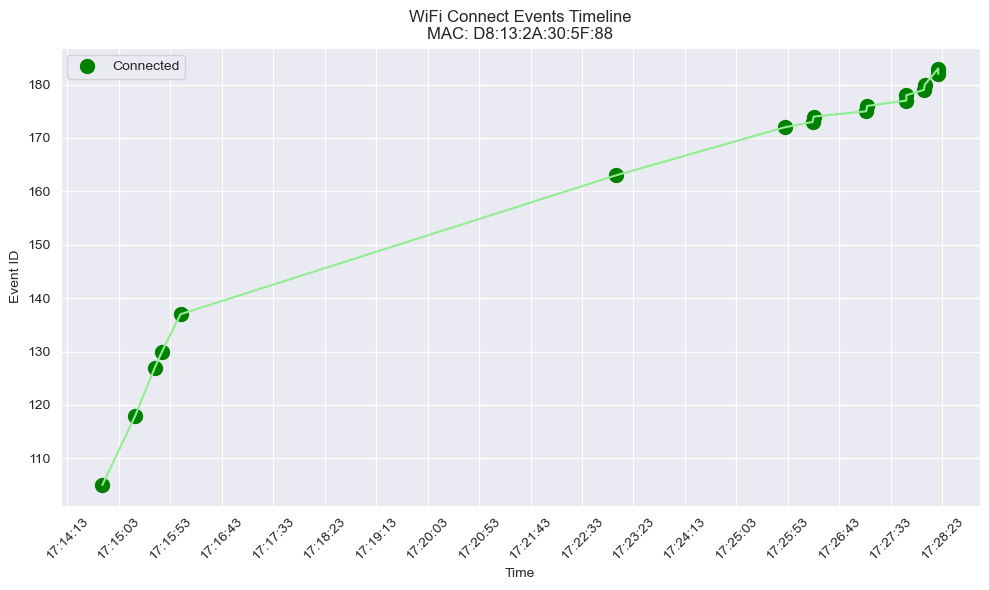

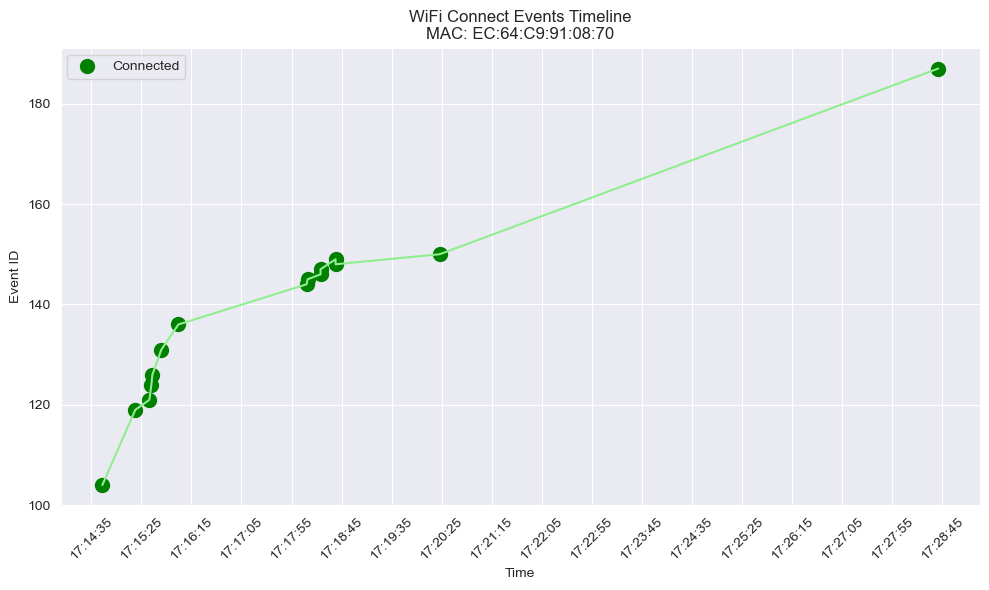

In [64]:
# now i want the graph plot for connect timings vs id for eacch device there must be serepate plots

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
os.makedirs('../src/static',exist_ok=True)
# List of target MAC addresses
target_macs = [
    "EC:64:C9:91:04:5C",
    "30:C9:22:EF:95:88",
    "D8:13:2A:30:5F:88",
    "EC:64:C9:91:08:70"
]

# Ensure 'Time_dt' exists
if 'Time_dt' not in df_wifi.columns:
    df_wifi['Time_dt'] = pd.to_datetime(df_wifi['Time'].astype(str), format='%H:%M:%S')
# Create 'diff_seconds' if missing
if 'diff_seconds' not in df_wifi.columns:
    df_wifi['diff_seconds'] = df_wifi['Time_dt'].diff().dt.total_seconds
    df_wifi['diff_seconds'] = df_wifi['diff_seconds'].fillna(0)

# Extract MAC addresses
df_wifi['MAC'] = df_wifi['Event'].str.extract(r'([0-9A-F]{2}(?::[0-9A-F]{2}){5})', expand=False)


colors = {'connected': 'green', 'disconnected': 'red'}
for mac in target_macs:
    df_mac = df_wifi[df_wifi['MAC'] == mac]
    if df_mac.empty:
        continue
    df_connect = df_mac[df_mac['Event'].str.contains('connected')]

    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    plt.scatter(df_connect['Time_dt'], df_connect['ID'], s=100, color=colors['connected'], label='Connected')
    plt.plot(df_connect['Time_dt'], df_connect['ID'], linestyle='-', color='lightgreen')

    for i, row in df_connect.iterrows():
        val = row['diff_seconds']
        if pd.notna(val) and not callable(val):
            plt.text(row['Time_dt'], row['ID']+0.2, f"{int(val)}s", ha='center')

    ax.xaxis.set_major_locator(mdates.SecondLocator(interval=50))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    plt.title(f"WiFi Connect Events Timeline\nMAC: {mac}")
    plt.xlabel("Time")
    plt.ylabel("Event ID")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'log_dashboard/app/static/wifi_connect_timeline_{mac.replace(":", "")}.png')
    plt.show()
    plt.close()

In [1]:
# okay now i want plots that are have the same as above connected time vs id but now in the line plot i want to show the time difference between the current connected event and the previous disconnected event
# so that i can see how much time it took to reconnect after disconnection

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

os.makedirs('../src/static',exist_ok=True)

target_macs = [
    "EC:64:C9:91:04:5C",
    "30:C9:22:EF:95:88",
    "D8:13:2A:30:5F:88",
    "EC:64:C9:91:08:70"
]

if 'Time_dt' not in df_wifi.columns:
    df_wifi['Time_dt'] = pd.to_datetime(df_wifi['Time'].astype(str), format='%H:%M:%S')

if 'diff_seconds' not in df_wifi.columns:
    df_wifi['diff_seconds'] = df_wifi['Time_dt'].diff().dt.total_seconds()
    df_wifi['diff_seconds'] = df_wifi['diff_seconds'].fillna(0)

df_wifi['MAC'] = df_wifi['Event'].str.extract(r'([0-9A-F]{2}(?::[0-9A-F]{2}){5})', expand=False)
colors = {'connected': 'green', 'disconnected': 'red'}

for mac in target_macs:
    df_mac = df_wifi[df_wifi['MAC'] == mac]
    if df_mac.empty:
        continue
    df_connect = df_mac[df_mac['Event'].str.contains('connected')].reset_index(drop=True)
    df_disconnect = df_mac[df_mac['Event'].str.contains('disconnected')].reset_index(drop=True)
    # Calculate time difference between previous disconnect and current connect
    reconnect_diffs = [None]
    for i in range(1, len(df_connect)):
        curr_connect_time = df_connect.loc[i, 'Time_dt']
        prev_disconnect = df_disconnect[df_disconnect['Time_dt'] < curr_connect_time]
        if not prev_disconnect.empty:
            disconnect_time = prev_disconnect.iloc[-1]['Time_dt']
            diff = (curr_connect_time - disconnect_time).total_seconds()
        else:
            diff = np.nan
        reconnect_diffs.append(diff)
    df_connect['reconnect_diff'] = reconnect_diffs
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    plt.scatter(df_connect['Time_dt'], df_connect['ID'], s=100, color="black", label='Connected')
    plt.plot(df_connect['Time_dt'], df_connect['ID'], linestyle='-', color='lightgreen')
    # Annotate lines between connect events with time difference
    for i in range(1, len(df_connect)):
        x1, y1 = df_connect.loc[i-1, 'Time_dt'], df_connect.loc[i-1, 'ID']
        x2, y2 = df_connect.loc[i, 'Time_dt'], df_connect.loc[i, 'ID']
        diff = df_connect.loc[i, 'reconnect_diff']
        if diff is not None and not np.isnan(diff):
            mid_x = x1 + (x2 - x1) / 2
            mid_y = y1 + (y2 - y1) / 2
            plt.text(mid_x, mid_y, f"{int(diff)}s", color="black", ha="center", va="bottom", fontweight="bold")
    ax.xaxis.set_major_locator(mdates.SecondLocator(interval=50))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    plt.title(f"WiFi Reconnect Time After Disconnect\nMAC: {mac}")
    plt.xlabel("Time")
    plt.ylabel("Event ID")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'log_dashboard/app/static/wifi_reconnect_timeline_{mac.replace(":", "")}.png')
    plt.show()
    plt.close()

NameError: name 'df_wifi' is not defined